<a href="https://colab.research.google.com/github/9-coding/TensorFlow/blob/main/performance_visualization.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

11490434/11490434 [==============================] - 0s 0us/step
Epoch 1/50
469/469 - 16s - loss: 0.0881 - accuracy: 0.2198 - val_loss: 0.0851 - val_accuracy: 0.3281 - 16s/epoch - 34ms/step
Epoch 2/50
469/469 - 9s - loss: 0.0820 - accuracy: 0.4082 - val_loss: 0.0780 - val_accuracy: 0.4887 - 9s/epoch - 19ms/step
Epoch 3/50
469/469 - 6s - loss: 0.0743 - accuracy: 0.5335 - val_loss: 0.0697 - val_accuracy: 0.5780 - 6s/epoch - 13ms/step
Epoch 4/50
469/469 - 3s - loss: 0.0664 - accuracy: 0.5989 - val_loss: 0.0624 - val_accuracy: 0.6303 - 3s/epoch - 7ms/step
Epoch 5/50
469/469 - 4s - loss: 0.0598 - accuracy: 0.6504 - val_loss: 0.0563 - val_accuracy: 0.6808 - 4s/epoch - 9ms/step
Epoch 6/50
469/469 - 3s - loss: 0.0544 - accuracy: 0.6884 - val_loss: 0.0513 - val_accuracy: 0.7124 - 3s/epoch - 7ms/step
Epoch 7/50
469/469 - 3s - loss: 0.0499 - accuracy: 0.7118 - val_loss: 0.0472 - val_accuracy: 0.7359 - 3s/epoch - 7ms/step
Epoch 8/50
469/469 - 4s - loss: 0.0463 - accuracy: 0.7315 - val_loss: 0.0439

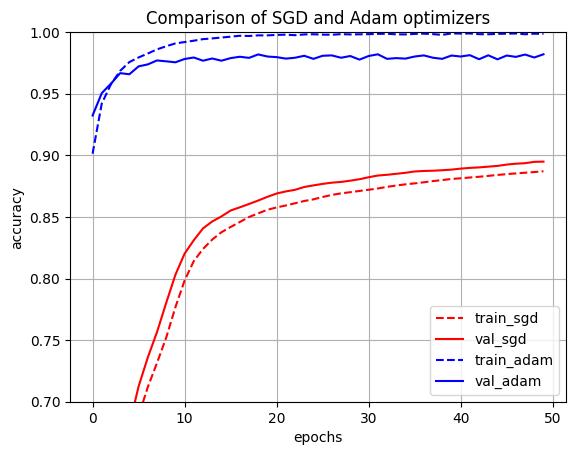

In [1]:
# comparison of SGD and Adam optimizers with visualization

import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
import tensorflow.keras.datasets as ds

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import SGD, Adam

# 데이터 준비
(x_train, y_train), (x_test, y_test)=ds.mnist.load_data()
# 28x28을 784로 펼침.
x_train=x_train.reshape(60000, 784)
x_test=x_test.reshape(10000, 784)
# 원래 데이터형 unit8을 실수 연산을 위해 float32로 변환, [0,255] 범위를 [0,1]로.
x_train=x_train.astype(np.float32)/255.0
x_test=x_test.astype(np.float32)/255.0
# 0~9 사이의 정수로 표현된 것을 one-hot-vector로 변환.
y_train=tf.keras.utils.to_categorical(y_train,10)
y_test=tf.keras.utils.to_categorical(y_test,10)


# SGD 모델 구성
mlp_sgd=Sequential()
mlp_sgd.add(Dense(units=512, activation='tanh', input_shape=(784,))) # 은닉층에 512개, 입력층에 784개 노드 배치.
mlp_sgd.add(Dense(units=10, activation='softmax')) # 출력층에 노드 10개 배치 (카테고리가 10개)

# SGD 학습
# compile과 fit 동시에 사용.
mlp_sgd.compile(loss='MSE', optimizer=SGD(learning_rate=0.01), metrics=['accuracy'])
hist_sgd=mlp_sgd.fit(x_train, y_train, batch_size=128, epochs=50, validation_data=(x_test, y_test), verbose=2)


# Adam 모델 구성
mlp_adam=Sequential()
mlp_adam.add(Dense(units=512, activation='tanh', input_shape=(784,))) # 은닉층에 512개, 입력층에 784개 노드 배치.
mlp_adam.add(Dense(units=10, activation='softmax')) # 출력층에 노드 10개 배치 (카테고리가 10개)

# Adam 학습
# compile과 fit 동시에 사용.
mlp_adam.compile(loss='MSE', optimizer=Adam(learning_rate=0.001), metrics=['accuracy'])
hist_adam=mlp_adam.fit(x_train, y_train, batch_size=128, epochs=50, validation_data=(x_test, y_test), verbose=2)


# 예측 및 성능 측정
print('SGD 정확도=', mlp_sgd.evaluate(x_test, y_test, verbose=0)[1]*100)
print('Adam 정확도=', mlp_adam.evaluate(x_test, y_test, verbose=0)[1]*100)


# 그래프 그리기
plt.plot(hist_sgd.history['accuracy'], 'r--')
plt.plot(hist_sgd.history['val_accuracy'], 'r')
plt.plot(hist_adam.history['accuracy'], 'b--')
plt.plot(hist_adam.history['val_accuracy'], 'b')
plt.title('Comparison of SGD and Adam optimizers')
plt.ylim((0.7, 1.0))
plt.xlabel('epochs') # x축 제목
plt.ylabel('accuracy') # y축 제목
plt.legend(['train_sgd', 'val_sgd', 'train_adam', 'val_adam']) # 범례
plt.grid() # 격자
plt.show()

## Memo

fit 함수는 epoch 마다 cost function 값과 accuracy를 측정하여 딕셔너리에 담아 반환.<br>
이를 history로 불러와서 값을 보거나 그래프로 그릴 수 있다.<br>
history의 출력은 아래와 같다.

### matplotlib line option
- 'r--':  빨간색 점선
- 'r': 빨간색 실선
- 'b--':  파란색 점선
- 'b': 파란색 실선

In [2]:
print('SGD history')
print(hist_sgd.history)
print('\nAdam history')
print(hist_adam.history)

SGD history
{'loss': [0.08807526528835297, 0.08199780434370041, 0.07430026680231094, 0.06642399728298187, 0.05981094390153885, 0.05435652658343315, 0.049924448132514954, 0.046305011957883835, 0.043250419199466705, 0.04058541730046272, 0.03823951259255409, 0.03620024770498276, 0.034441303461790085, 0.03292006254196167, 0.03160089999437332, 0.030450260266661644, 0.029439259320497513, 0.02854517288506031, 0.02774915285408497, 0.027036990970373154, 0.026394018903374672, 0.025811661034822464, 0.025280650705099106, 0.024794839322566986, 0.024348607286810875, 0.023936137557029724, 0.0235541183501482, 0.023198476061224937, 0.022867264226078987, 0.022557063028216362, 0.02226625196635723, 0.021992839872837067, 0.02173505909740925, 0.02149103954434395, 0.02126060612499714, 0.021042266860604286, 0.02083457261323929, 0.020636793226003647, 0.020448170602321625, 0.020268332213163376, 0.020096533000469208, 0.019931813701987267, 0.019774004817008972, 0.019622884690761566, 0.019477449357509613, 0.019337